<a href="https://colab.research.google.com/github/jeffyelson/IntroductiontoDeepLearning/blob/main/IDL_03_ConvNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 0s 0us/step
5


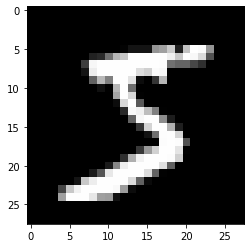

In [ ]:
*mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_labels[0])
plt.imshow(train_images[0], cmap="Greys_r")

# first difference: data is not reshaped to 784 anymore, but 28x28x1
# note the 1 color channel!! this is important
train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat()

test_images = test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255
test_labels = test_labels.astype(np.int32)
*
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images, test_labels)).batch(128)

In [ ]:
train_steps = 2500

model = tf.keras.Sequential([
    
    #first convolution layer
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu",padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2,padding='same'),

    #second convolution layer
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu",padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2,padding='same'),

    #Flatten
    tf.keras.layers.Flatten(),

    #output layer
    #tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data):
    if step > train_steps:
        break

    with tf.GradientTape() as tape:
        logits = model(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss = loss_fn(label_batch, logits)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables = model.trainable_variables
    gradients = tape.gradient(loss, variables)
      
    optimizer.apply_gradients(zip(gradients, variables))
    
    train_acc_metric(label_batch, logits)
    
    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Step {} Loss: {} Accuracy: {}".format(step, loss, train_acc_metric.result()))
        train_acc_metric.reset_states()
        
del tape   

Step 0 Loss: 2.313544750213623 Accuracy: 0.125
Step 100 Loss: 0.16334038972854614 Accuracy: 0.8121874928474426
Step 200 Loss: 0.22055524587631226 Accuracy: 0.9414843916893005
Step 300 Loss: 0.17726153135299683 Accuracy: 0.9446874856948853
Step 400 Loss: 0.1333964765071869 Accuracy: 0.9568750262260437
Step 500 Loss: 0.09879229962825775 Accuracy: 0.9512844681739807
Step 600 Loss: 0.19768789410591125 Accuracy: 0.9612500071525574
Step 700 Loss: 0.02787507325410843 Accuracy: 0.962109386920929
Step 800 Loss: 0.058468542993068695 Accuracy: 0.9593750238418579
Step 900 Loss: 0.11865168809890747 Accuracy: 0.9618750214576721
Step 1000 Loss: 0.13916456699371338 Accuracy: 0.9696115255355835
Step 1100 Loss: 0.06468477100133896 Accuracy: 0.962109386920929
Step 1200 Loss: 0.05832729488611221 Accuracy: 0.9614843726158142
Step 1300 Loss: 0.10697980225086212 Accuracy: 0.9560937285423279
Step 1400 Loss: 0.030540069565176964 Accuracy: 0.958984375
Step 1500 Loss: 0.16616326570510864 Accuracy: 0.965225577354

In [ ]:
# this is very convenient -- before, we usually had code that
# evaluates the whole test set at once -- this won't work for
# large datasets/models. With metrics, we can just iterate
# over the data and the metric takes care of averaging etc.

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.9610999822616577


## ConvNets using CIFAR10 Dataset

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(train_images_c10, train_labels_c10), (test_images_c10, test_labels_c10) = cifar10.load_data()

##Reference - https://www.tensorflow.org/tutorials/images/cnn

train_labels_c10 = tf.keras.utils.to_categorical(train_labels_c10)
test_labels_c10 = tf.keras.utils.to_categorical(test_labels_c10)


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
train_data_c10 = tf.data.Dataset.from_tensor_slices(
    (train_images_c10.reshape([-1, 32, 32, 3]).astype(np.float32) / 255, train_labels_c10.astype(np.int32)))
train_data_c10 = train_data_c10.shuffle(buffer_size=60000).batch(128).repeat()

test_images_c10 = test_images_c10.reshape([-1, 32, 32, 3]).astype(np.float32) / 255
test_labels_c10 = test_labels_c10.astype(np.int32)

test_data_c10 = tf.data.Dataset.from_tensor_slices(
    (test_images_c10, test_labels_c10)).batch(128)

In [ ]:
train_steps = 2500


model2 = tf.keras.Sequential([
    
    #first convolution layer
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu",kernel_initializer='he_uniform',use_bias=True,input_shape=(32,32,3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu",kernel_initializer='he_uniform',use_bias=True,padding='SAME'),
    tf.keras.layers.MaxPooling2D((2, 2),strides=2),

    #second convolution layer
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu",kernel_initializer='he_uniform',use_bias=True,padding='SAME'),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu",kernel_initializer='he_uniform',use_bias=True,padding='SAME'),
    tf.keras.layers.MaxPooling2D((2, 2),strides=2),

    #third convolution layer
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu",padding='SAME'),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu",padding='SAME'),
    tf.keras.layers.MaxPooling2D((2, 2),strides=2),

    #Flatten
    tf.keras.layers.Flatten(),

    #output layer
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn2 = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model2.build()

In [ ]:
train_acc_metric_c10 = tf.keras.metrics.CategoricalAccuracy()

for step, (image_batch, label_batch) in enumerate(train_data_c10):

    if step > train_steps:
        break

    with tf.GradientTape(persistent=True) as tape4:
        logits_c10 = model2(image_batch)
        # loss format is generally: first argument targets, second argument outputs
        loss_c10 = loss_fn2(label_batch, logits_c10)

    # if you didn't build the model, it is important that you get the variables
    # AFTER the model has been called the first time
    variables_c10 = model2.trainable_variables
    gradients_c10 = tape4.gradient(loss_c10, variables_c10)
      
    optimizer2.apply_gradients(zip(gradients_c10, variables_c10))
    
    train_acc_metric_c10(label_batch, logits_c10)
    
    if not step % 100:
        # this is different from before. there, we only evaluated accuracy
        # for one batch. Now, we always average over 100 batches
        print("Step {} Loss: {} Accuracy: {}".format(step, loss_c10, train_acc_metric_c10.result()))
        train_acc_metric_c10.reset_states()

del tape4
    

Step 0 Loss: 2.342642068862915 Accuracy: 0.09375
Step 100 Loss: 1.711855411529541 Accuracy: 0.27085936069488525
Step 200 Loss: 1.6306042671203613 Accuracy: 0.408203125
Step 300 Loss: 1.4589457511901855 Accuracy: 0.46976563334465027
Step 400 Loss: 1.3054313659667969 Accuracy: 0.5134880542755127
Step 500 Loss: 1.1809064149856567 Accuracy: 0.5500781536102295
Step 600 Loss: 1.2064803838729858 Accuracy: 0.5669531226158142
Step 700 Loss: 1.1401807069778442 Accuracy: 0.5860156416893005
Step 800 Loss: 1.0931447744369507 Accuracy: 0.6029642224311829
Step 900 Loss: 1.057612419128418 Accuracy: 0.6231250166893005
Step 1000 Loss: 1.014563798904419 Accuracy: 0.6337500214576721
Step 1100 Loss: 0.8469104766845703 Accuracy: 0.6321874856948853
Step 1200 Loss: 1.184548258781433 Accuracy: 0.648760974407196
Step 1300 Loss: 0.917815089225769 Accuracy: 0.6783593893051147
Step 1400 Loss: 1.0334255695343018 Accuracy: 0.6756250262260437
Step 1500 Loss: 0.861527681350708 Accuracy: 0.6789844036102295
Step 1600 Lo

In [ ]:
test_acc_metric_c10 = tf.keras.metrics.CategoricalAccuracy()
for image_batch, label_batch in test_data_c10:
    test_acc_metric_c10(label_batch, model2(image_batch))
print("Test acc: {}".format(test_acc_metric_c10.result()))

Test acc: 0.10000000149011612
